# MSDS 422 Assignment 1: Exploring and Visualizing Data


## Management Questions
Imagine that you are an academic administrator responsible for defining the future direction of the graduate program. The MSPA Survey has been designed with these objectives in mind:


*   Learn about current student software preferences.
*   Learn about student interest in potential new courses.
*   Guide software and systems planning for current and future courses.
*   Guide data science curriculum planning.


## Background on Data
The MSPA Software Survey was collected in December 2016. Data from the survey were used to inform data science curriculum planning. These data are provided in the accompnying comma-delimited text file (mspa-survey-data.csv).

The survey was conducted online using Survey Monkey. A printed form of the survey items is provided in accompnying pdf file (mspa_software_survey.pdf).

In [8]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
#from google.colab import files

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Preparation

In [10]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
#valid_survey_input = pd.read_csv('/content/drive/My Drive/MSDS 422/Assignments/mspa-software-survey-case-python-v005/mspa-survey-data.csv')
valid_survey_input = pd.read_csv('mspa-survey-data.csv')
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)
valid_survey_input.head()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [11]:
#using the info() function to get a concise summary of the dataframe, including column names, data types, and number of null values
print(valid_survey_input.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5135740122 to 5109806898
Data columns (total 40 columns):
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS                        207 non-null int64
Python_Course_Interest              206 non-null float

In [12]:
# examine the structure of the DataFrame object
print('\nContents of initial survey data:')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print('\nDataFrame column values:\n', valid_survey_input.columns.values)

# abbreviated printing of the first five rows of the data frame
print(valid_survey_input.head())


Contents of initial survey data:

Number of Respondents = 207

DataFrame column values:
 ['Personal_JavaScalaSpark' 'Personal_JavaScriptHTMLCSS' 'Personal_Python'
 'Personal_R' 'Personal_SAS' 'Professional_JavaScalaSpark'
 'Professional_JavaScriptHTMLCSS' 'Professional_Python' 'Professional_R'
 'Professional_SAS' 'Industry_JavaScalaSpark' 'Industry_JavaScriptHTMLCSS'
 'Industry_Python' 'Industry_R' 'Industry_SAS' 'Python_Course_Interest'
 'Foundations_DE_Course_Interest' 'Analytics_App_Course_Interest'
 'Systems_Analysis_Course_Interest' 'Courses_Completed' 'PREDICT400'
 'PREDICT401' 'PREDICT410' 'PREDICT411' 'PREDICT413' 'PREDICT420'
 'PREDICT422' 'PREDICT450' 'PREDICT451' 'PREDICT452' 'PREDICT453'
 'PREDICT454' 'PREDICT455' 'PREDICT456' 'PREDICT457' 'OtherPython'
 'OtherR' 'OtherSAS' 'Other' 'Graduate_Date']
              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0  

In [13]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

### Defining Subset DataFrames
Throughout the data preparation stage, I define various subset DataFrames to facilitate subsequent exploration/analysis of the different features in the survey. The DataFrame I will primarily use is df1, which comprises the following data: software preferences, new course interest, and courses completed.

In [14]:
#define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
print(software_df.columns.values) #confirming all relevant columns are captured in new subset DataFrame

#define subset DataFrame for analysis of course interest
course_int_df = survey_df.loc[:,'Python_Course_Interest':'Systems_Analysis_Course_Interest']
print('\n', course_int_df.columns.values) #confirming all relevant columns are captured in new subset DataFrame

#define subset DataFrame for software preference and course interest data
cols = ['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest','Courses_Completed']
df1 = survey_df.loc[:,cols]
print('\n', df1.columns.values) #confirming all relevant columns are captured in new subset DataFrame

['My_Java' 'My_JS' 'My_Python' 'My_R' 'My_SAS' 'Prof_Java' 'Prof_JS'
 'Prof_Python' 'Prof_R' 'Prof_SAS' 'Ind_Java' 'Ind_JS' 'Ind_Python'
 'Ind_R' 'Ind_SAS']

 ['Python_Course_Interest' 'Foundations_DE_Course_Interest'
 'Analytics_App_Course_Interest' 'Systems_Analysis_Course_Interest']

 ['My_Java' 'My_JS' 'My_Python' 'My_R' 'My_SAS' 'Prof_Java' 'Prof_JS'
 'Prof_Python' 'Prof_R' 'Prof_SAS' 'Ind_Java' 'Ind_JS' 'Ind_Python'
 'Ind_R' 'Ind_SAS' 'Python_Course_Interest'
 'Foundations_DE_Course_Interest' 'Analytics_App_Course_Interest'
 'Systems_Analysis_Course_Interest' 'Courses_Completed']


## Data Exploration & Visualization
Given this survey was conducted in 2016, I am tackling the data exploration step with the assumption that Python, R, and Java are the most trending languages for students in the MSPA program. This assumption is based on a ranking of the most popular programming language for machine learning and data science, as reported here: https://fossbytes.com/popular-top-programming-languages-machine-learning-data-science/

In [15]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data:\n')
df1.describe()


Descriptive statistics for survey data:



,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


### Refining list of Trending Languages
The results of the descriptive statistics indicate that Python and R are the two most preferred languages by MSPA students, with R having a slightly higher mean than Python. Given this new observation, I will eliminate Java from the list of trending languages.

In [16]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [17]:
#calculating standard correlation coefficient (i.e., Pearson’s r) for df1
corr_matrix_df1 = df1.corr()
corr_matrix_df1
print('Correlaton of each attribute with preference for Python:\n')
print(corr_matrix_df1['My_Python'].sort_values(ascending=False))

print('\nCorrelaton of each attribute with preference for R:\n')
print(corr_matrix_df1['My_R'].sort_values(ascending=False))

Correlaton of each attribute with preference for Python:

My_Python                           1.000000
Ind_Python                          0.779632
Prof_Python                         0.730511
Python_Course_Interest              0.323268
Foundations_DE_Course_Interest      0.137317
Analytics_App_Course_Interest       0.082331
Prof_JS                             0.020761
Systems_Analysis_Course_Interest   -0.008505
Courses_Completed                  -0.056593
Ind_Java                           -0.081856
Ind_JS                             -0.092460
Prof_Java                          -0.152992
My_JS                              -0.173517
My_Java                            -0.197282
Ind_R                              -0.255296
Prof_R                             -0.283518
Prof_SAS                           -0.333732
My_R                               -0.374659
Ind_SAS                            -0.408018
My_SAS                             -0.491077
Name: My_Python, dtype: float64

Correlato

In [18]:
#calculating standard correlation coefficient (i.e., Pearson’s r) for software preferences
corr_matrix_softwarepref = software_df.corr()
corr_matrix_softwarepref

print('Correlation of each software preference attribute with preference for Python:\n')
print(corr_matrix_softwarepref['My_Python'].sort_values(ascending=False))

print('\nCorrelation of each software preference attribute with preference for R:\n')
print(corr_matrix_softwarepref['My_R'].sort_values(ascending=False))

Correlation of each software preference attribute with preference for Python:

My_Python      1.000000
Ind_Python     0.779632
Prof_Python    0.730511
Prof_JS        0.020761
Ind_Java      -0.081856
Ind_JS        -0.092460
Prof_Java     -0.152992
My_JS         -0.173517
My_Java       -0.197282
Ind_R         -0.255296
Prof_R        -0.283518
Prof_SAS      -0.333732
My_R          -0.374659
Ind_SAS       -0.408018
My_SAS        -0.491077
Name: My_Python, dtype: float64

Correlation of each software preference attribute with preference for R:

My_R           1.000000
Prof_R         0.763444
Ind_R          0.667045
Ind_SAS        0.042775
Prof_SAS      -0.152498
My_SAS        -0.155090
Prof_Java     -0.247095
Ind_Java      -0.247213
Ind_Python    -0.263190
Prof_JS       -0.296240
Ind_JS        -0.306092
My_JS         -0.321997
Prof_Python   -0.344084
My_Python     -0.374659
My_Java       -0.391172
Name: My_R, dtype: float64


In [19]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

/Users/ALFRED/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

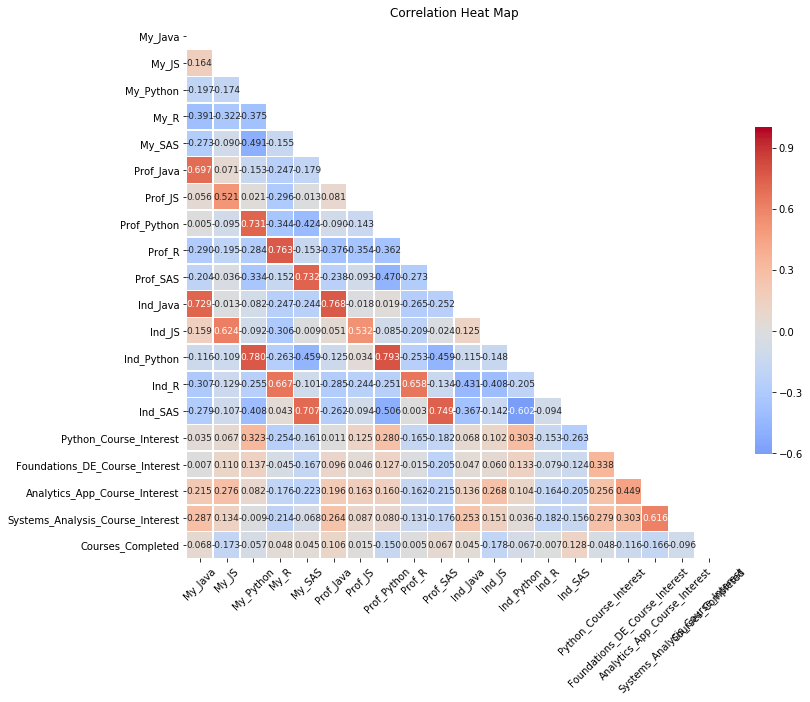

In [20]:
# examine intercorrelations among software preference variables with correlation matrix/heat map
corr_chart(df_corr = df1) 

### Focusing on Personal Software Preference
Upon examining the intercorrelations among the software preference and course interest variables, it is clear there is a strong correlation between a student's personal preference (e.g., My_Python or My_R) for a particular language and his/her view of how important that same language is professionally and in the industry. Therefore, to facilitate subsequent data exploration/analysis, I will be examining only the personal preference variables (e.g., My_Python, My_R, My_Java, etc.).

In [21]:
#Defining new subset DataFrame that narrows down attributes to personal software preferences and course interest data
cols = ['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS',  'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest','Courses_Completed']
df2 = survey_df.loc[:,cols]
print(df2.columns.values) #confirming the new dataframe includes the features I want

#define subset DataFrame for analysis of only personal software preferences
software_df2 = survey_df.loc[:, 'My_Java':'My_SAS']
print('\n', software_df2.columns.values) #confirming all relevant columns are captured in new subset DataFrame

['My_Java' 'My_JS' 'My_Python' 'My_R' 'My_SAS' 'Python_Course_Interest'
 'Foundations_DE_Course_Interest' 'Analytics_App_Course_Interest'
 'Systems_Analysis_Course_Interest' 'Courses_Completed']

 ['My_Java' 'My_JS' 'My_Python' 'My_R' 'My_SAS']


### Using Paired Plots & Histograms to Confirm Assumptions
A grid view of scatter plots and histograms for all the features indicate that among programming languages preferences, Python and R are the most normally distributed. This confirms the initial assumption about the popularity of both languages among MSPA students.

/Users/ALFRED/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ALFRED/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


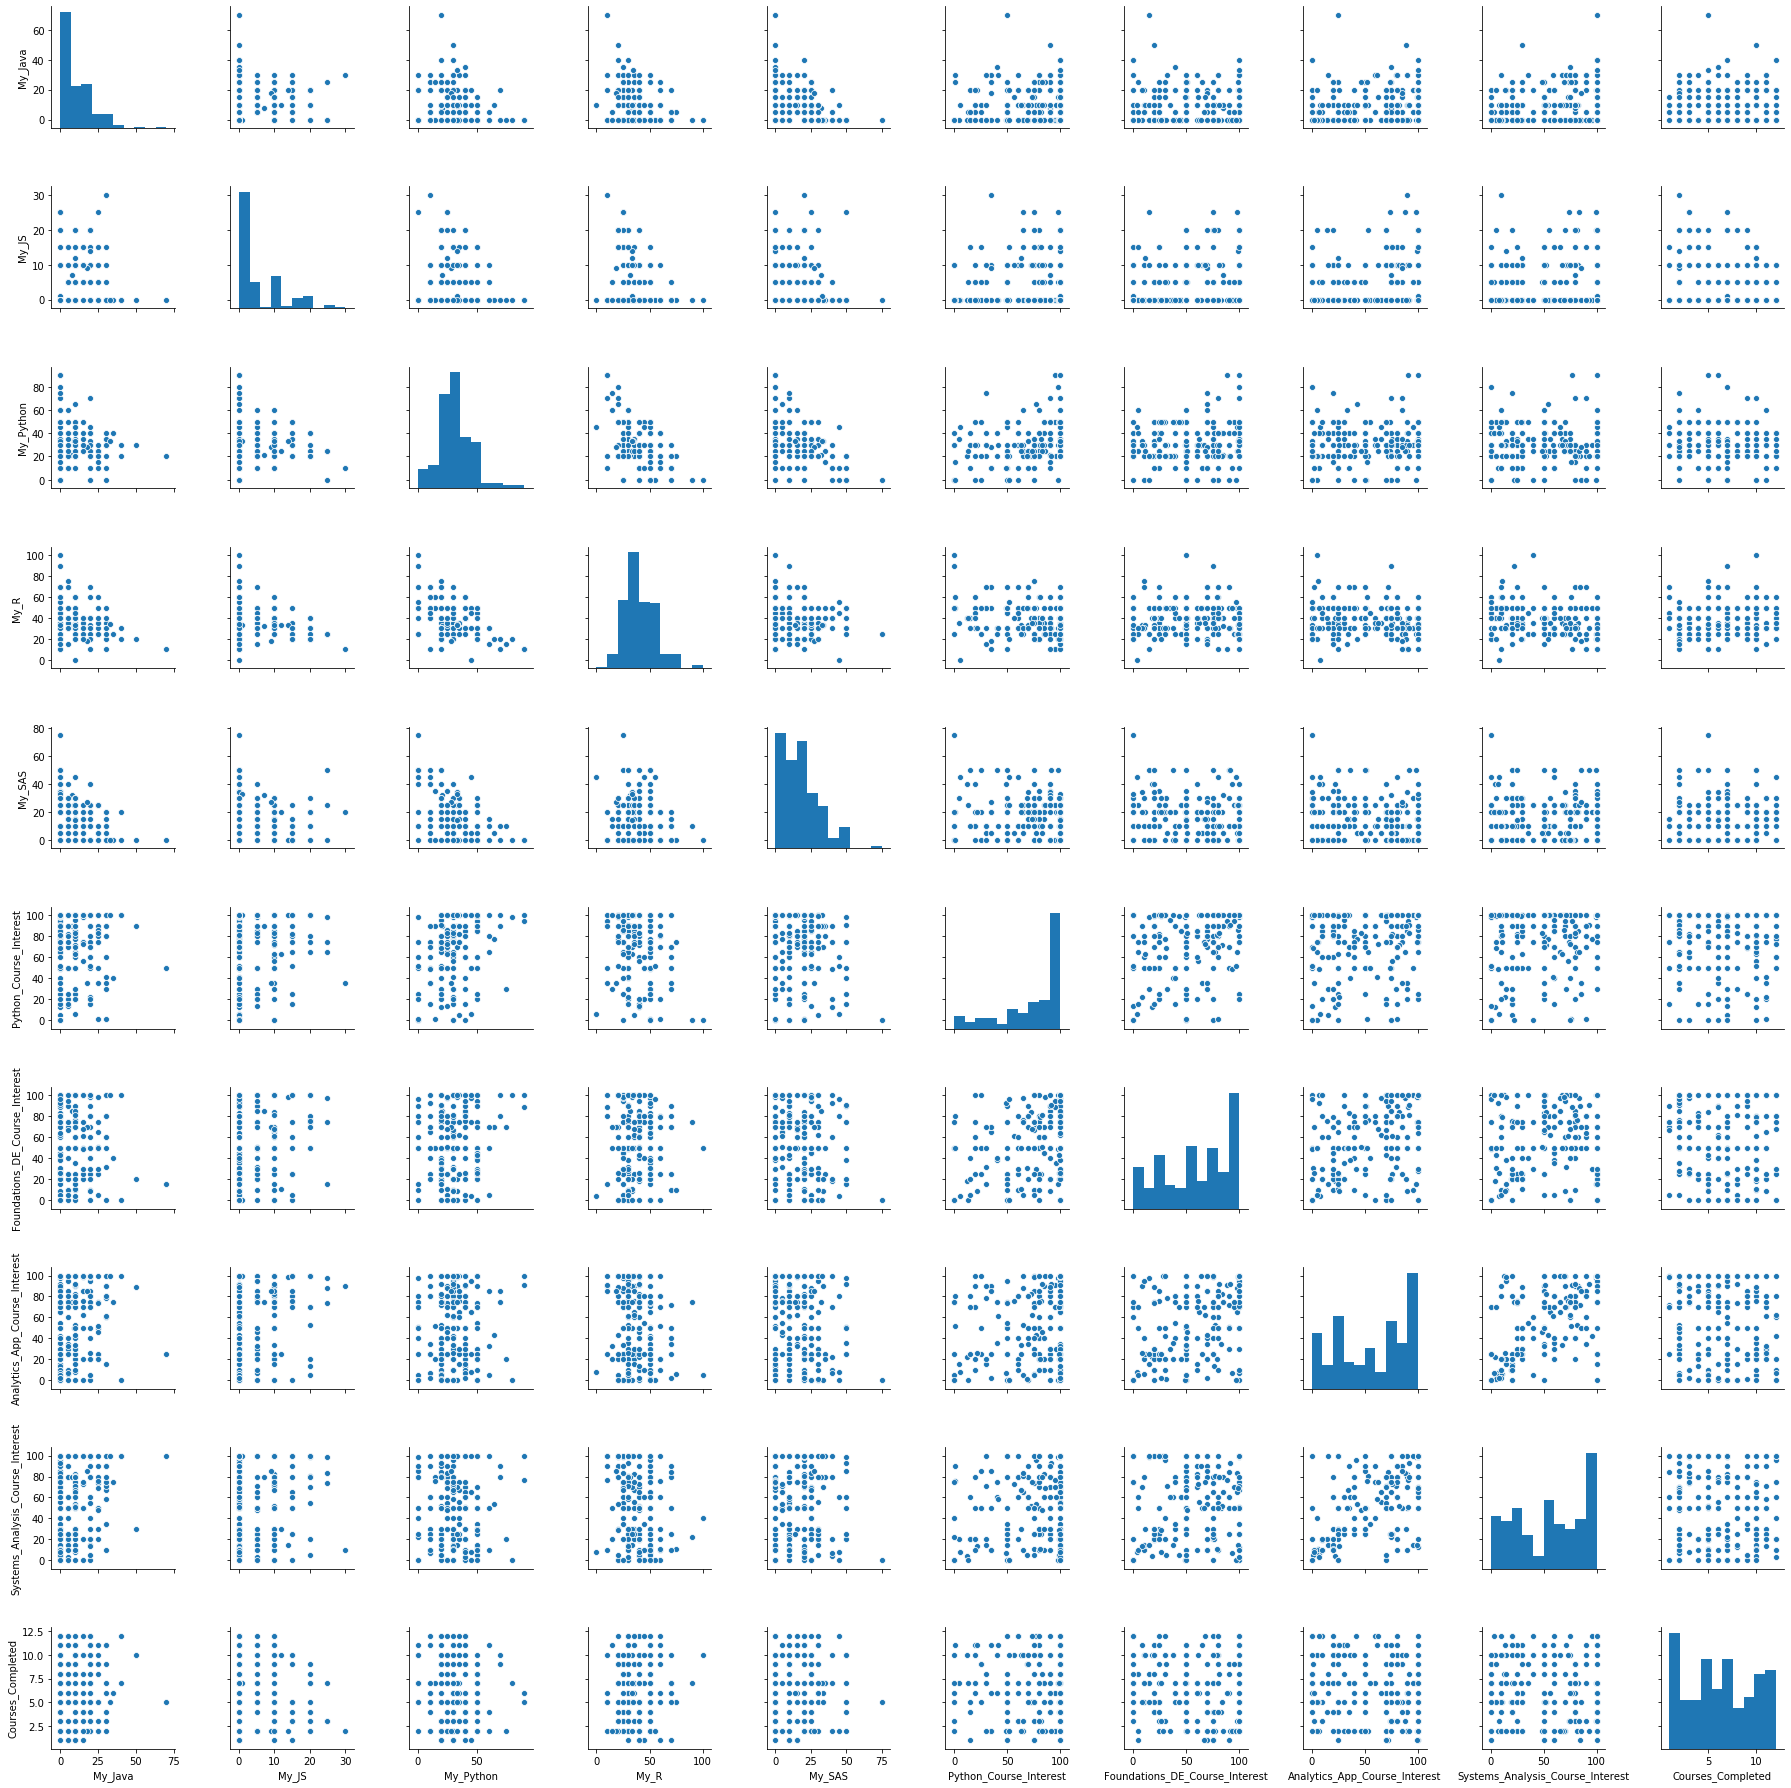

In [22]:
#Yet another alternative method of checking intercorrelation among all attributes using Pairplot
#Cleaner visual display than scatter_matrix
sns_plot = sns.pairplot(df2)
#sns_plot.savefig('df2_pairs_plot.pdf')
#files.download('df2_pairs_plot.pdf')

### Boxplots Provide Further Insights
Boxplots are an effective tool to visualize other important aspects of the data, including its distribution, outliers, and whether the data is symmetrical or skewed.

#### Software Preference Data
The boxplots for software preferences validate the trends displayed via the scatter plots and histograms; Python and R are the most preferred programming languages and the most normally distributed.

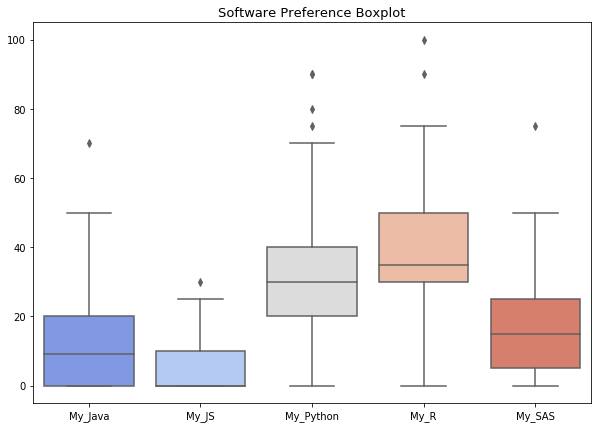

In [23]:
#plotting boxplot for further visual analysis, particularly on notable outliers
plt.subplots(figsize=(10,7))
sns.boxplot(data = software_df2, palette='coolwarm')
plt.title('Software Preference Boxplot', fontsize = 13)
# plt.savefig('Software_Preference_Boxplot.png') #saving plot image
# files.download('Software_Preference_Boxplot.png')
plt.show()

#### Course Interest Data
The course interest data indicates a noticeably higher interest in a Python course than the other courses mentioned in the survey. When building a model to predict this particular feature, however, it would be worth considering other variables not accounted for in the survey, such as the student's professional background and academic courses taken prior to enrolling in the MSPA program. The correlation between the software preferences for Python and interest in a new Python course are not too insightful.

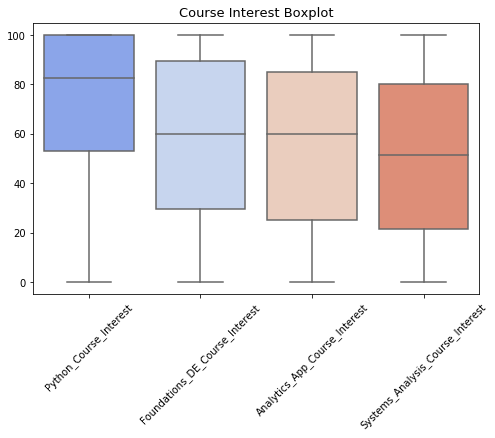

In [24]:
#plotting boxplot specifically on course interest data
plt.subplots(figsize=(8,5))
ax = sns.boxplot(data = course_int_df, palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Course Interest Boxplot', fontsize = 13)
# plt.savefig('Course Interest Boxplot'.png') #saving plot image
# files.download('Course Interest Boxplot'.png')
plt.show()

In [25]:
#checking mean and median values of software preference data for a better understanding of how much more interest there is in a python course
print(course_int_df.mean(), '\n')

print(course_int_df.median())

#calculating correlation of each course interest attribute with preference for Python course interest
print('\nCorrelaton of each course interest attribute with preference for Python course interest:\n')
print(corr_matrix_df1['Python_Course_Interest'].sort_values(ascending=False))

Python_Course_Interest              73.529126
Foundations_DE_Course_Interest      58.045000
Analytics_App_Course_Interest       55.201970
Systems_Analysis_Course_Interest    53.630000
dtype: float64 

Python_Course_Interest              82.5
Foundations_DE_Course_Interest      60.0
Analytics_App_Course_Interest       60.0
Systems_Analysis_Course_Interest    51.5
dtype: float64

Correlaton of each course interest attribute with preference for Python course interest:

Python_Course_Interest              1.000000
Foundations_DE_Course_Interest      0.337504
My_Python                           0.323268
Ind_Python                          0.303357
Prof_Python                         0.280337
Systems_Analysis_Course_Interest    0.278808
Analytics_App_Course_Interest       0.255525
Prof_JS                             0.125292
Ind_JS                              0.101687
Ind_Java                            0.068279
My_JS                               0.067480
My_Java                           

## Data Scaling & Comparison
The distribution plots of the python course variable as well as software preference for all languages others than Python and R indicate heavy left-tailed and heavy right-tailed distributions, respectively. Skewed and unscaled data can affect machine learning efforts so I will apply some common transformations to standardize the data from these variables.

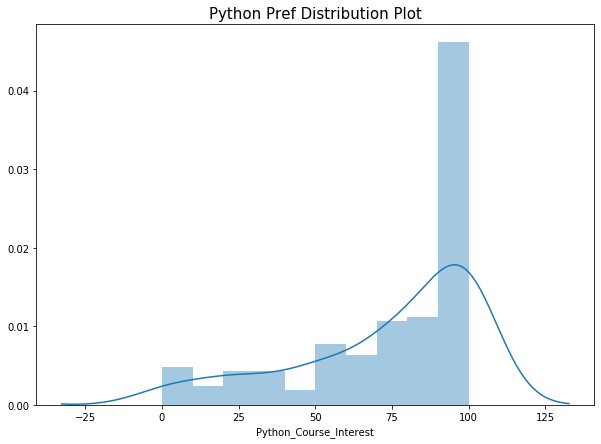

In [26]:
#Plotting distribution plot to check 
plt.subplots(figsize=(10,7))
#sns.distplot(df2['Python_Course_Interest'].dropna())
sns.distplot(df2['Python_Course_Interest'].dropna(), hist=True,bins=10,kde=True)
plt.title('Python Pref Distribution Plot', fontsize = 15)
plt.show()

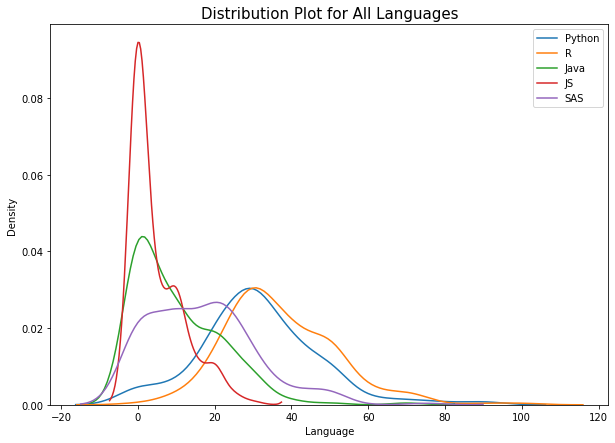

In [27]:
#Plotting distribution plot to check 
plt.subplots(figsize=(10,7))
#sns.distplot(df2['Python_Course_Interest'].dropna())
sns.distplot(software_df2['My_Python'].dropna(), hist=False,bins=10,kde=True, label='Python')
sns.distplot(software_df2['My_R'].dropna(), hist=False,bins=10,kde=True, label='R')
sns.distplot(software_df2['My_Java'].dropna(), hist=False,bins=10,kde=True, label='Java')
sns.distplot(software_df2['My_JS'].dropna(), hist=False,bins=10,kde=True, label='JS')
sns.distplot(software_df2['My_SAS'].dropna(), hist=False,bins=10,kde=True, label='SAS')
plt.title('Distribution Plot for All Languages', fontsize = 15)
plt.xlabel('Language')
plt.ylabel('Density')  
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

### Best Transformation Method for "Python Course Interest" Variable
The transformations applied on the "Python Course Interest" variable rescaled the data, but with the exception of the Quantile Transformation method, most of the scalers still returned results that were heavily skewed to the left. Between the two Quantile Tranformation methods (normal vs uniform), the uniform approach returned a better result. If I were to select a transformation method for the "Python Course Interest" variable, it would be Quantile Transformation (uniform).

/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (206). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (206). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Text(0.5, 1.0, 'Normalizer')

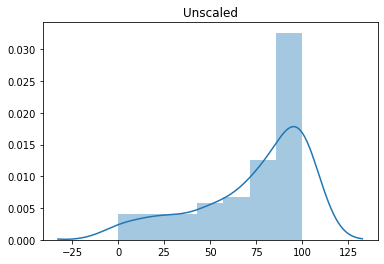

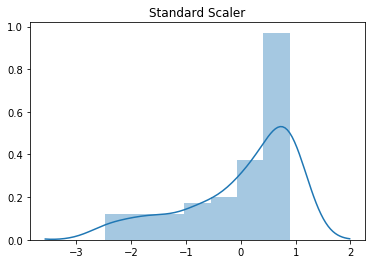

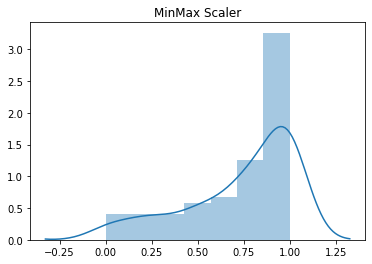

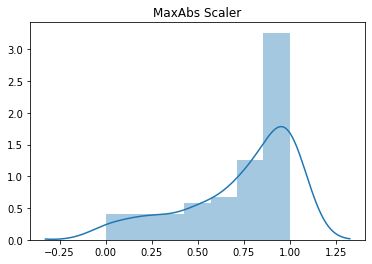

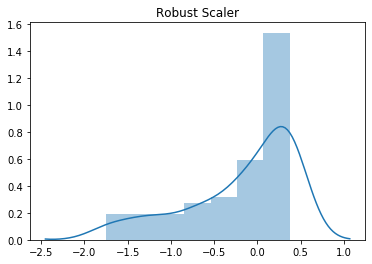

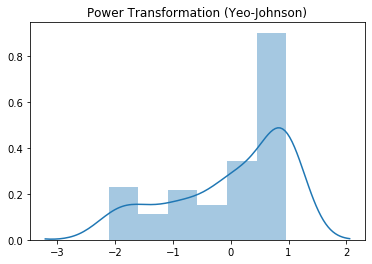

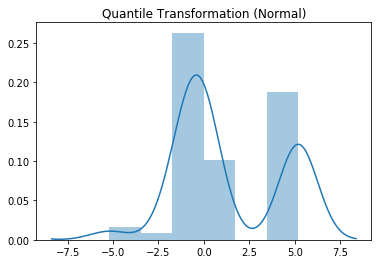

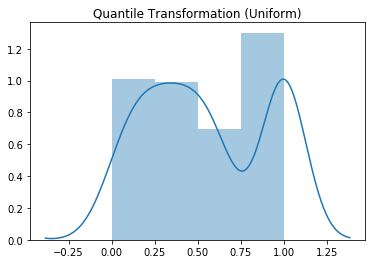

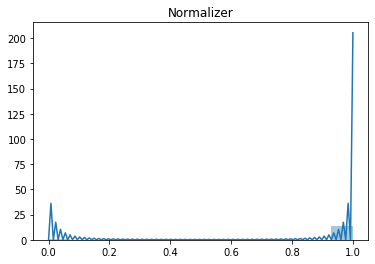

In [29]:
#transformation for Python course interest variable

#creating new variable for Python course interest to facilitate transformations 
X = survey_df['Python_Course_Interest'].dropna()
X = X.values.reshape(-1,1)

unscaled_fig, ax = plt.subplots()
sns.distplot(X,kde=True).set_title('Unscaled')

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X),kde=True).set_title('Standard Scaler')

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X),kde=True).set_title('MinMax Scaler')

maxabs_fig, ax = plt.subplots()
sns.distplot(MaxAbsScaler().fit_transform(X), kde = True).set_title('MaxAbs Scaler')

robust_fig, ax = plt.subplots()
sns.distplot(RobustScaler(quantile_range=(25, 75)).fit_transform(X), kde = True).set_title('Robust Scaler')

power_fig, ax = plt.subplots()
sns.distplot(PowerTransformer(method='yeo-johnson').fit_transform(X),kde=True).set_title('Power Transformation (Yeo-Johnson)')

quantile_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='normal').fit_transform(X),kde=True).set_title('Quantile Transformation (Normal)')

uniform_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='uniform').fit_transform(X),kde=True).set_title('Quantile Transformation (Uniform)')

normalizer_fig, ax = plt.subplots()
sns.distplot(Normalizer().fit_transform(X), kde = True).set_title('Normalizer')


### Best Transformation Method for Java Preference
The transformations applied on Java preference values rescaled the data, but most of the scalers still returned results that were heavily skewed to the right. The Power Transformation, Quantile Tranformation (normal and uniform), and Normalizer methods returned slightly better result, although not ideal. If I were to select a transformation method for this variable, it would be one of the four methods that are neither heavily left- or right-skewed.

/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (207). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (207). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Text(0.5, 1.0, 'Normalizer')

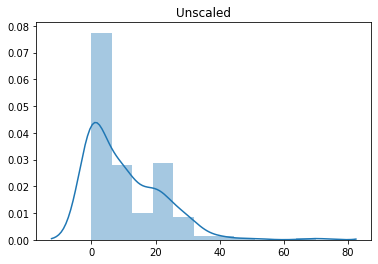

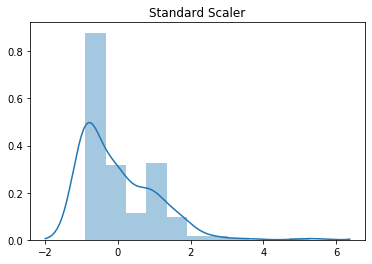

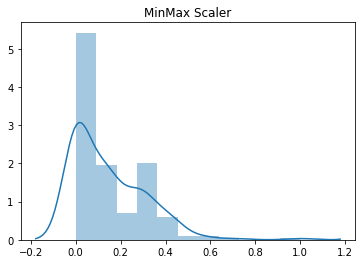

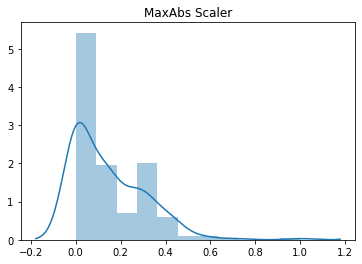

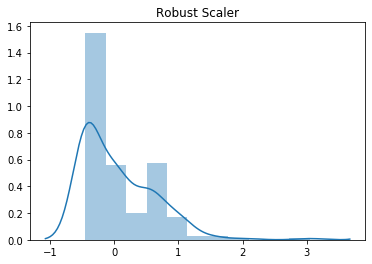

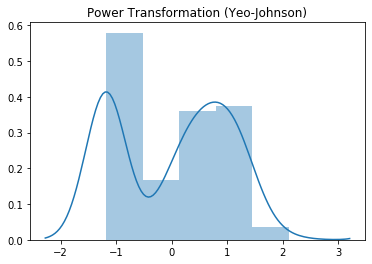

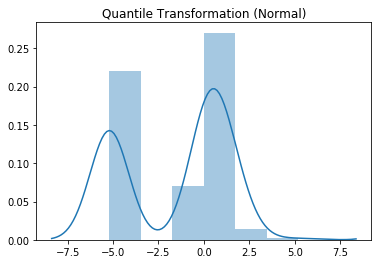

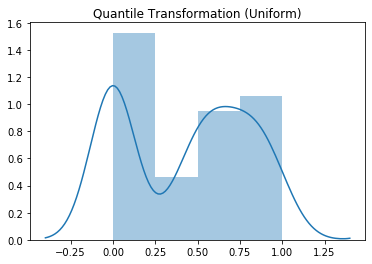

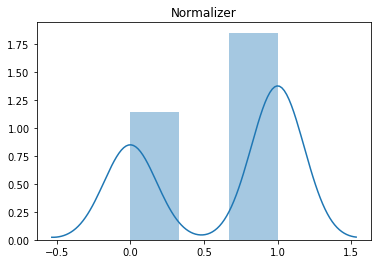

In [30]:
#transformation for Java language preference variable

#creating new variable for Python course interest to facilitate transformations 
X = survey_df['My_Java'].dropna()
X = X.values.reshape(-1,1)

unscaled_fig, ax = plt.subplots()
sns.distplot(X,kde=True).set_title('Unscaled')

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X),kde=True).set_title('Standard Scaler')

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X),kde=True).set_title('MinMax Scaler')

maxabs_fig, ax = plt.subplots()
sns.distplot(MaxAbsScaler().fit_transform(X), kde = True).set_title('MaxAbs Scaler')

robust_fig, ax = plt.subplots()
sns.distplot(RobustScaler(quantile_range=(25, 75)).fit_transform(X), kde = True).set_title('Robust Scaler')

power_fig, ax = plt.subplots()
sns.distplot(PowerTransformer(method='yeo-johnson').fit_transform(X),kde=True).set_title('Power Transformation (Yeo-Johnson)')

quantile_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='normal').fit_transform(X),kde=True).set_title('Quantile Transformation (Normal)')

uniform_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='uniform').fit_transform(X),kde=True).set_title('Quantile Transformation (Uniform)')

normalizer_fig, ax = plt.subplots()
sns.distplot(Normalizer().fit_transform(X), kde = True).set_title('Normalizer')


### Best Transformation Method for Javascript Preference
The transformations applied on Javascript preference values rescaled the data, but most of the scalers still returned results that were heavily skewed to the right. The Power Transformation, Quantile Tranformation (normal and uniform), and Normalizer methods returned slightly better result, although not ideal. If I were to select a transformation method for this variable, it would be one of the four methods that are neither heavily left- or right-skewed.

/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (207). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (207). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Text(0.5, 1.0, 'Normalizer')

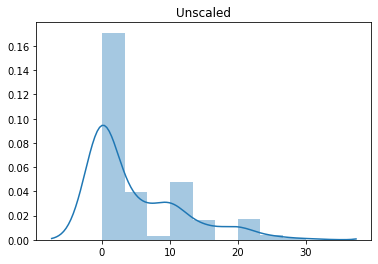

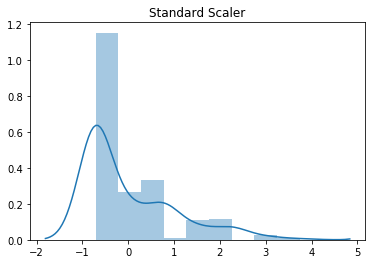

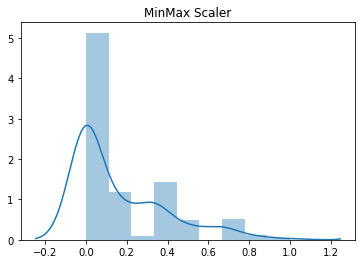

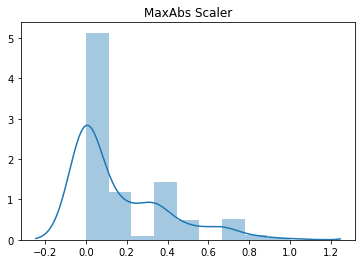

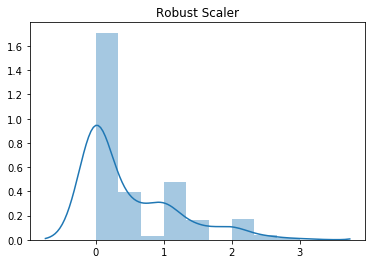

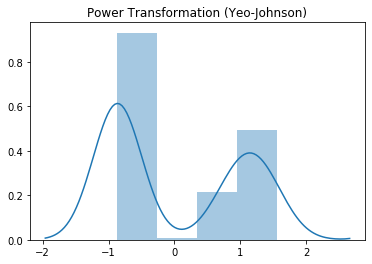

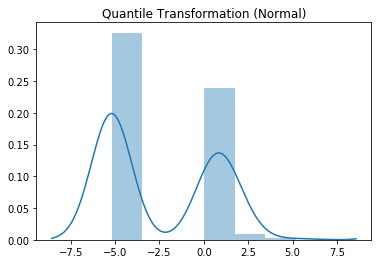

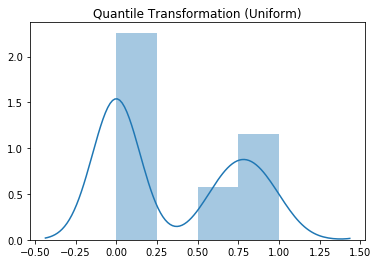

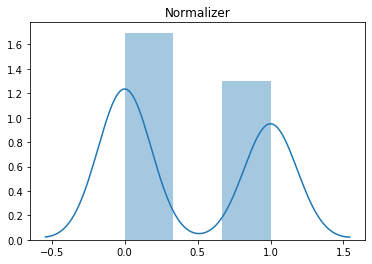

In [31]:
#transformation for Javascript (JS) language preference variable

#creating new variable for Python course interest to facilitate transformations 
X = survey_df['My_JS'].dropna()
X = X.values.reshape(-1,1)

unscaled_fig, ax = plt.subplots()
sns.distplot(X,kde=True).set_title('Unscaled')

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X),kde=True).set_title('Standard Scaler')

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X),kde=True).set_title('MinMax Scaler')

maxabs_fig, ax = plt.subplots()
sns.distplot(MaxAbsScaler().fit_transform(X), kde = True).set_title('MaxAbs Scaler')

robust_fig, ax = plt.subplots()
sns.distplot(RobustScaler(quantile_range=(25, 75)).fit_transform(X), kde = True).set_title('Robust Scaler')

power_fig, ax = plt.subplots()
sns.distplot(PowerTransformer(method='yeo-johnson').fit_transform(X),kde=True).set_title('Power Transformation (Yeo-Johnson)')

quantile_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='normal').fit_transform(X),kde=True).set_title('Quantile Transformation (Normal)')

uniform_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='uniform').fit_transform(X),kde=True).set_title('Quantile Transformation (Uniform)')

normalizer_fig, ax = plt.subplots()
sns.distplot(Normalizer().fit_transform(X), kde = True).set_title('Normalizer')


### Best Transformation Method for SAS Preference
The transformations applied on SAS preference values rescaled the data, but most of the scalers still returned results that were skewed to the right. The Power Transformation returned the best result, although not ideal. If I were to select a transformation method for this variable, it would be the Power Transformation method.

/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (207). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/ALFRED/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (207). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Text(0.5, 1.0, 'Normalizer')

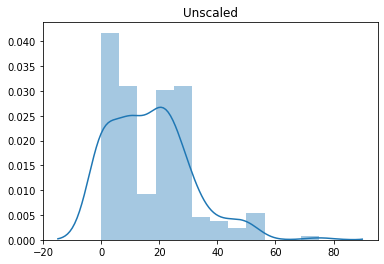

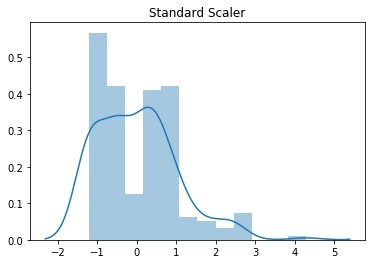

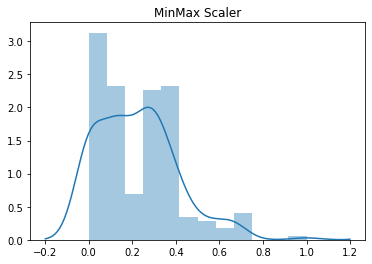

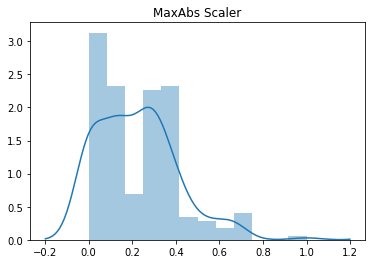

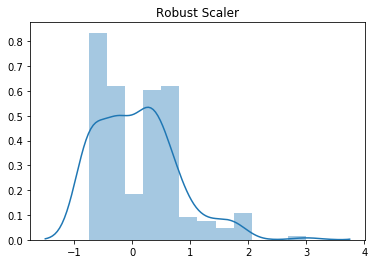

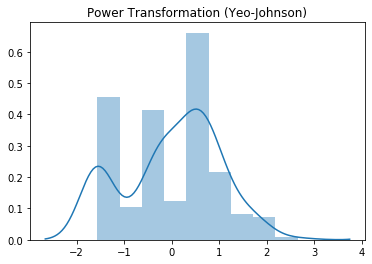

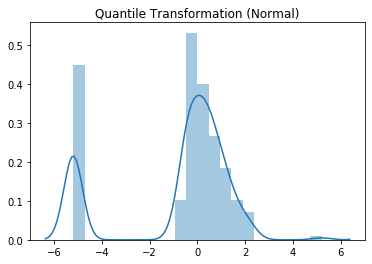

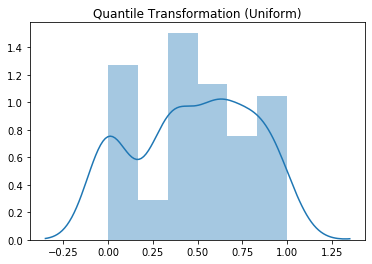

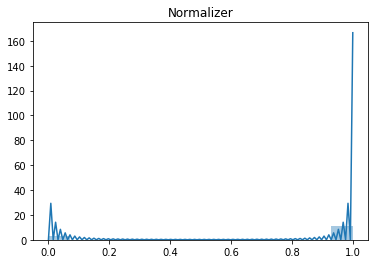

In [32]:
#transformation for SAS language preference variable

#creating new variable for Python course interest to facilitate transformations 
X = survey_df['My_SAS'].dropna()
X = X.values.reshape(-1,1)

unscaled_fig, ax = plt.subplots()
sns.distplot(X,kde=True).set_title('Unscaled')

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X),kde=True).set_title('Standard Scaler')

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X),kde=True).set_title('MinMax Scaler')

maxabs_fig, ax = plt.subplots()
sns.distplot(MaxAbsScaler().fit_transform(X), kde = True).set_title('MaxAbs Scaler')

robust_fig, ax = plt.subplots()
sns.distplot(RobustScaler(quantile_range=(25, 75)).fit_transform(X), kde = True).set_title('Robust Scaler')

power_fig, ax = plt.subplots()
sns.distplot(PowerTransformer(method='yeo-johnson').fit_transform(X),kde=True).set_title('Power Transformation (Yeo-Johnson)')

quantile_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='normal').fit_transform(X),kde=True).set_title('Quantile Transformation (Normal)')

uniform_fig, ax = plt.subplots()
sns.distplot(QuantileTransformer(output_distribution='uniform').fit_transform(X),kde=True).set_title('Quantile Transformation (Uniform)')

normalizer_fig, ax = plt.subplots()
sns.distplot(Normalizer().fit_transform(X), kde = True).set_title('Normalizer')


## Insights & Recommendations
Based on the analysis of the survey data, key recommendations to the MSPA program leadership, administration, and curriculum planners would consist of the following:
* Given the significantly high preference for either Python or R among all students surveyed, it would be beneficial for students to have the option of taking courses in either language. The data indicates that both languages are very popular among MSPA students, but the negative correlation between the preference for each language suggests that students who have a strong preference for Python do not prefer R, and vice versa.
* •	Despite the noticeable differences in software preference, particularly between Python and R, there appears to be a strong consensus among students for a new Python course. While there could be external factors (not captured in this survey) that contribute to this trend—such as professional background or academic courses taken prior to MSPA, the data suggests that a new Python course would be well-received among MSPA students.